In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pybaseball as pyb
import sklearn.datasets
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.integrate import quad, dblquad
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
pyb.cache.enable()

In [ ]:
data_19 = pyb.statcast(start_dt="2019-01-01", end_dt="2019-12-31")

In [25]:
data_20 = pyb.statcast(start_dt="2020-01-01", end_dt="2020-12-31")

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


  0%|                                                    | 0/97 [00:22<?, ?it/s]


StatcastException: Error: Query Timeout. Please try to limit your query to less data.

In [24]:
data_21 = pyb.statcast(start_dt="2021-01-01", end_dt="2021-12-31")
data_22 = pyb.statcast(start_dt="2022-01-01", end_dt="2022-12-31")
data_23 = pyb.statcast(start_dt="2023-01-01", end_dt="2023-12-31")

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|█████████████████████████████████████████| 246/246 [00:55<00:00,  4.44it/s]


This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|█████████████████████████████████████████| 246/246 [00:55<00:00,  4.45it/s]


This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|█████████████████████████████████████████| 246/246 [00:57<00:00,  4.28it/s]


In [26]:
data = data_19.append(data_21)
data = data.append(data_22)
data = data.append(data_23)

/var/folders/c6/9d1p2frs7cj3n0lvks3jxxp00000gn/T/ipykernel_1256/1946406973.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_19.append(data_21)
/var/folders/c6/9d1p2frs7cj3n0lvks3jxxp00000gn/T/ipykernel_1256/1946406973.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_22)
/var/folders/c6/9d1p2frs7cj3n0lvks3jxxp00000gn/T/ipykernel_1256/1946406973.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_23)


In [27]:
filtered_data = data[data['player_name'] == 'Webb, Logan']

In [6]:
hard_data = filtered_data[['game_date','release_speed','ax','az','vy0','release_pos_x','release_pos_z','home_team','away_team','game_type','zone','launch_speed','launch_angle']]

In [25]:
def sweet_spot(data):
    result = []
    for i in data['launch_angle']:
        if 15 <= i <= 20:
            result += '1'
        else:
            result += '0'
    return result
            
def hard_hit(data):
    result = []
    for i in data['launch_speed']:
        if i>= 95:
            result += '1'
        else:
            result += '0'
    return result

In [3]:
p_2019 = hard_data.loc[hard_data['game_date'].dt.year == 2019]
p_2020 = hard_data.loc[hard_data['game_date'].dt.year == 2020]
p_2021= hard_data.loc[hard_data['game_date'].dt.year == 2021]
p_2022= hard_data.loc[hard_data['game_date'].dt.year == 2022]
p_2023= hard_data.loc[hard_data['game_date'].dt.year == 2023]

NameError: name 'hard_data' is not defined

In [8]:
launch_data = hard_data[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()
launch_data_19 = p_2019[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()
launch_data_20 = p_2020[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()
launch_data_21 = p_2021[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()
launch_data_22 = p_2022[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()
launch_data_23 = p_2023[['launch_angle', 'launch_speed']].replace({pd.NA: np.nan}).dropna()

In [28]:
launch_data['sweet_spot'] = sweet_spot(launch_data)
launch_data['hard_hit'] = hard_hit(launch_data)
launch_data_19['sweet_spot'] = sweet_spot(launch_data_19)
launch_data_19['hard_hit'] = hard_hit(launch_data_19)
launch_data_20['sweet_spot'] = sweet_spot(launch_data_20)
launch_data_20['hard_hit'] = hard_hit(launch_data_20)
launch_data_21['sweet_spot'] = sweet_spot(launch_data_21)
launch_data_21['hard_hit'] = hard_hit(launch_data_21)
launch_data_22['sweet_spot'] = sweet_spot(launch_data_22)
launch_data_22['hard_hit'] = hard_hit(launch_data_22)
launch_data_23['sweet_spot'] = sweet_spot(launch_data_23)
launch_data_23['hard_hit'] = hard_hit(launch_data_23)

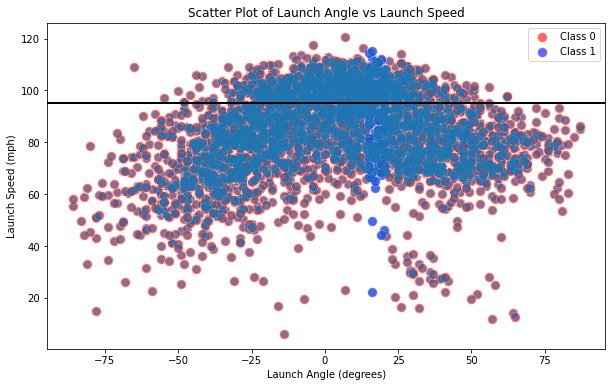

In [35]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data['sweet_spot'].unique():
    subset = launch_data[launch_data['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data['launch_angle'], launch_data['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

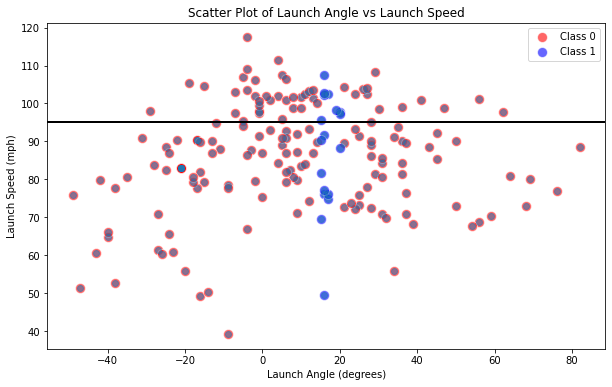

In [36]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data_19['sweet_spot'].unique():
    subset = launch_data_19[launch_data_19['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data_19['launch_angle'], launch_data_19['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

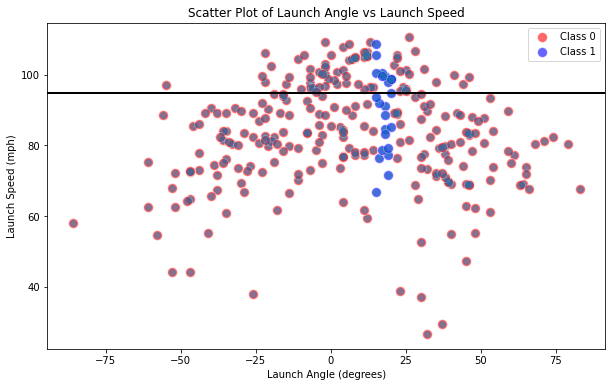

In [37]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data_20['sweet_spot'].unique():
    subset = launch_data_20[launch_data_20['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data_20['launch_angle'], launch_data_20['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

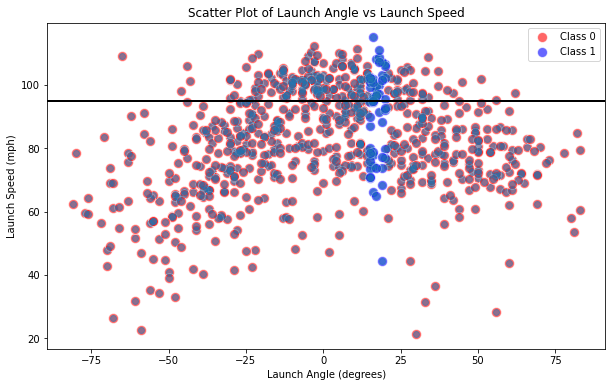

In [38]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data['sweet_spot'].unique():
    subset = launch_data_21[launch_data_21['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data_21['launch_angle'], launch_data_21['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

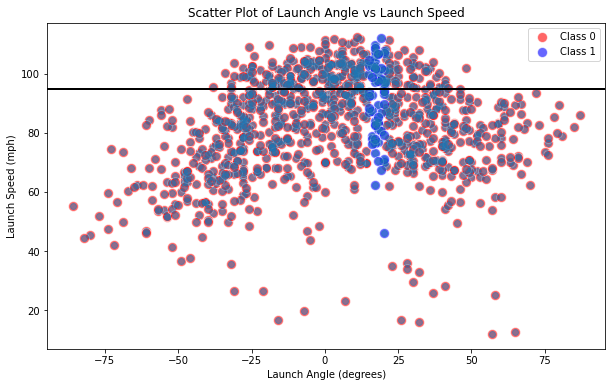

In [39]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data_22['sweet_spot'].unique():
    subset = launch_data_22[launch_data_22['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data_22['launch_angle'], launch_data_22['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

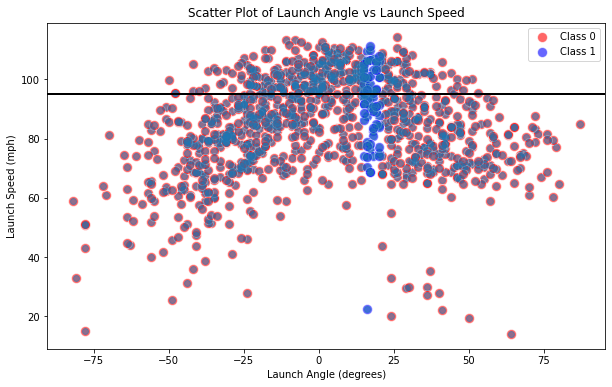

In [40]:
plt.figure(figsize=(10, 6))
colormap = {'0': 'r','1': 'b'}
for cls in launch_data_23['sweet_spot'].unique():
    subset = launch_data_23[launch_data_23['sweet_spot'] == cls]
    plt.scatter(subset['launch_angle'], subset['launch_speed'], c=colormap[cls], label=f'Class {cls}', alpha=0.6, edgecolors='w', s=100)
plt.scatter(launch_data_23['launch_angle'], launch_data_23['launch_speed'], alpha=0.5)
plt.axhline(y=95, color='black',linewidth=2)
plt.title('Scatter Plot of Launch Angle vs Launch Speed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (mph)')
plt.legend()
plt.show()

In [77]:
relate = hard_data.replace({pd.NA: np.nan}).dropna()

In [84]:
features = relate[['release_speed','ax','az','vy0','release_pos_x','release_pos_z']]

In [129]:
relate = pd.DataFrame(relate)

In [131]:
def mutual_information(x, y, bins=10):
    # Compute histograms for x and y
    hist_x, bin_edges_x = np.histogram(x, bins=bins, density=True)
    hist_y, bin_edges_y = np.histogram(y, bins=bins, density=True)
    
    # Compute joint histogram
    hist_joint, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    
    # Compute mutual information
    mutual_info = 0
    for i in range(bins):
        for j in range(bins):
            if hist_joint[i, j] > 0 and hist_x[i] > 0 and hist_y[j] > 0:
                mutual_info += hist_joint[i, j] * np.log(hist_joint[i, j] / (hist_x[i] * hist_y[j]))

    return mutual_info

In [134]:
# mutual information
mi_la = {feat: mutual_information(relate[feat],relate['launch_angle']) for feat in features.columns}
mi_ls = {feat: mutual_information(relate[feat],relate['launch_speed']) for feat in features.columns}

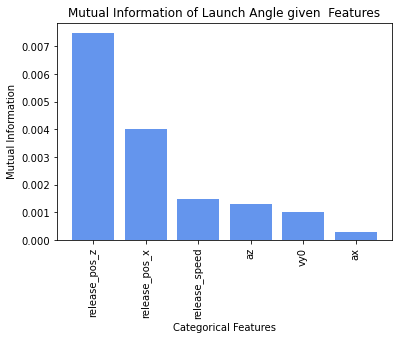

In [133]:
# sorted mutual information
sorted_mutual_information = dict(sorted(mi_la.items(), key=lambda item: item[1], reverse=True))
# bar plot of mutual information
plt.bar(sorted_mutual_information.keys(), sorted_mutual_information.values(), color = '#6495ed')
plt.title('Mutual Information of Launch Angle given  Features')
plt.xlabel('Categorical Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()

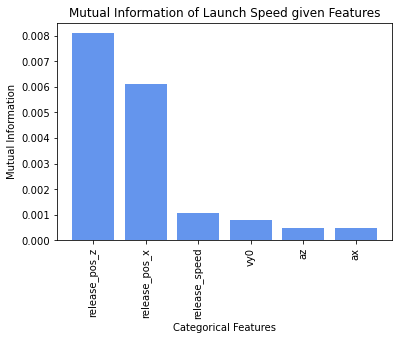

In [136]:
# sorted mutual information
sorted_mutual_information = dict(sorted(mi_ls.items(), key=lambda item: item[1], reverse=True))
# bar plot of mutual information
plt.bar(sorted_mutual_information.keys(), sorted_mutual_information.values(), color = '#6495ed')
plt.title('Mutual Information of Launch Speed given Features')
plt.xlabel('Categorical Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()